In [27]:
import pandas as pd
import os
import psycopg2
import dotenv

import matplotlib.pyplot as plt
import seaborn as sns

dotenv.load_dotenv(dotenv.find_dotenv())

pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [28]:
# Cria conexão com o banco de dados
def conexao():
    con = psycopg2.connect(
        user=os.getenv("POSTGRES_USER"),
        password=os.getenv("POSTGRES_PASSWORD"),
        database=os.getenv("POSTGRES_DB"),
        host="localhost",
    )

    return con

# Cria função para selecionar os dados
def se_dados(query):
    vcon = conexao()
    c = vcon.cursor()
    c.execute(query)
    rows = c.fetchall()
    vcon.commit()
    vcon.close()
    return rows   

In [46]:
ticker = 'ENAT3'

# Cria query 
query = f" SELECT DISTINCT data_ult_cotacao, papel, cotacao, pl, ev_ebitda, vpa \
            FROM dados \
                WHERE papel = '{ticker}' \
                        ORDER BY 2 "
result = se_dados(query)

# Cria DataFrame 
df_rl = pd.DataFrame(result)

df_rl.rename(columns={0:'Data', 
    1:'Papel', 
    2:'Cotação',
    3:'PL',
    4:'Ev_Ebitda',
    5:'VPA' }, inplace=True)

df_rl.set_index('Data', inplace = True)

df_rl.head()

,Papel,Cotação,PL,Ev_Ebitda,VPA
Data,,,,,
2021-11-19,ENAT3,"R$ 12,65",4.25,1.82,13.04
2021-11-22,ENAT3,"R$ 12,68",4.26,1.83,13.04
2021-11-23,ENAT3,"R$ 12,80",4.30,1.86,13.04
2021-11-24,ENAT3,"R$ 13,11",4.40,1.94,13.04
2021-11-25,ENAT3,"R$ 13,07",4.39,1.93,13.04


In [47]:
print(df_rl.dtypes)

df_rl['Cotação'] = df_rl['Cotação'].str.replace('R',' ', regex=True) 
df_rl['Cotação'] = df_rl['Cotação'].str.replace('$',' ', regex=True) 
df_rl['Cotação'] = df_rl['Cotação'].str.replace(',','.') # Alterando de virgula para ponto
df_rl['Cotação'] = df_rl['Cotação'].apply(pd.to_numeric)

print('-------')
print(df_rl.dtypes)
df_rl

Papel         object
Cotação       object
PL           float64
Ev_Ebitda    float64
VPA          float64
dtype: object
-------
Papel         object
Cotação      float64
PL           float64
Ev_Ebitda    float64
VPA          float64
dtype: object


,Papel,Cotação,PL,Ev_Ebitda,VPA
Data,,,,,
2021-11-19,ENAT3,12.65,4.25,1.82,13.04
2021-11-22,ENAT3,12.68,4.26,1.83,13.04
2021-11-23,ENAT3,12.80,4.30,1.86,13.04
2021-11-24,ENAT3,13.11,4.40,1.94,13.04
2021-11-25,ENAT3,13.07,4.39,1.93,13.04
...,...,...,...,...,...
2022-05-11,ENAT3,22.32,4.11,2.80,15.67
2022-05-12,ENAT3,21.46,4.19,2.42,14.99
2022-05-13,ENAT3,19.89,3.88,2.16,14.99


Text(0, 0.5, 'Ev_Ebitda')

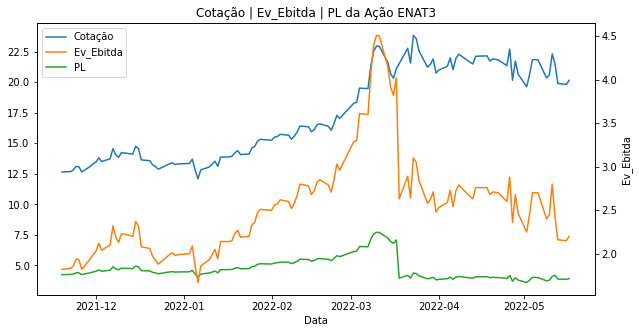

In [53]:
df_rl[['Cotação','Ev_Ebitda','PL']].plot(secondary_y='Ev_Ebitda',mark_right=False,figsize=(10,5));
plt.title(f'Cotação | Ev_Ebitda | PL da Ação {ticker}');
plt.ylabel('Ev_Ebitda')